Import Libraries & Load Dataset

In [2]:

import pandas as pd

# Load Global Superstore dataset (Orders sheet)
df = pd.read_csv(r"C:\Users\Vasuki\Desktop\Projects\Sales performance analysis\Global_Superstore.csv", encoding='latin1')

# Quick look at dataset
print(df.shape)       
print(df.columns)     
df.head()


(51290, 24)
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


Check for Missing Values

In [3]:
# Check missing values
print(df.isnull().sum())

# Drop rows with too many missing values (optional)
#df = df.dropna(how='all')  

# Fill missing values
df['Postal Code'] = df['Postal Code'].fillna(0)  # Example: fill missing postal codes with 0
  

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


In [4]:
# Check duplicates
print("Duplicates:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()


Duplicates: 0


In [5]:
# Convert Order Date & Ship Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Ensure numeric columns are correct
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')


C:\Users\Vasuki\AppData\Local\Temp\ipykernel_16636\2546993387.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
C:\Users\Vasuki\AppData\Local\Temp\ipykernel_16636\2546993387.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [6]:
# Strip spaces, convert to Title Case
df['Customer Name'] = df['Customer Name'].str.strip().str.title()
df['Category'] = df['Category'].str.strip().str.title()
df['Region'] = df['Region'].str.strip().str.title()
df['Sub-Category'] = df['Sub-Category'].str.strip().str.title()
df['Segment'] = df['Segment'].str.strip().str.title()       

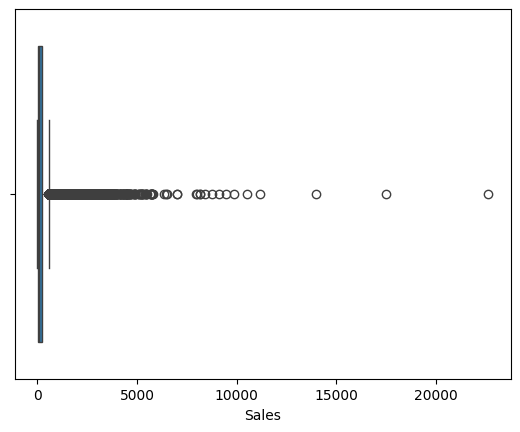

In [7]:

import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Sales
sns.boxplot(x=df['Sales'])
plt.show()

# Remove extreme outliers (e.g., Sales > 10,000)
df = df[df['Sales'] < 10000]


In [8]:
# Extract year, month, quarter
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Quarter'] = df['Order Date'].dt.quarter
# Calculate Shipping Duration
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days       
df['Shipping Duration']
   

0        0
1        2
2        1
3        2
4        1
        ..
51285    0
51286    4
51287    0
51288    4
51289    4
Name: Shipping Duration, Length: 51285, dtype: int64

In [9]:
# Save to new Excel/CSV file for SQL, Power BI
df.to_csv("Cleaned_Global_Superstore.csv", index=False)


Import Libraries & Dataset

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned dataset
df = pd.read_csv("Cleaned_Global_Superstore.csv")

# Quick overview
print(df.shape)
print(df.info())
print(df.describe())


(51285, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51285 entries, 0 to 51284
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Row ID             51285 non-null  int64  
 1   Order ID           51285 non-null  object 
 2   Order Date         51285 non-null  object 
 3   Ship Date          51285 non-null  object 
 4   Ship Mode          51285 non-null  object 
 5   Customer ID        51285 non-null  object 
 6   Customer Name      51285 non-null  object 
 7   Segment            51285 non-null  object 
 8   City               51285 non-null  object 
 9   State              51285 non-null  object 
 10  Country            51285 non-null  object 
 11  Postal Code        51285 non-null  float64
 12  Market             51285 non-null  object 
 13  Region             51285 non-null  object 
 14  Product ID         51285 non-null  object 
 15  Category           51285 non-null  object 
 16  Sub-Catego

Sales & Profit

In [11]:
print("Total Sales:", df['Sales'].sum())
print("Total Profit:", df['Profit'].sum())
print("Total Orders:", df['Order ID'].nunique())


Total Sales: 12566663.58188
Total Profit: 1445188.43848
Total Orders: 25034


. Sales by Region

C:\Users\Vasuki\AppData\Local\Temp\ipykernel_16636\1814302669.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.values, y=region_sales.index, palette="Blues_r")


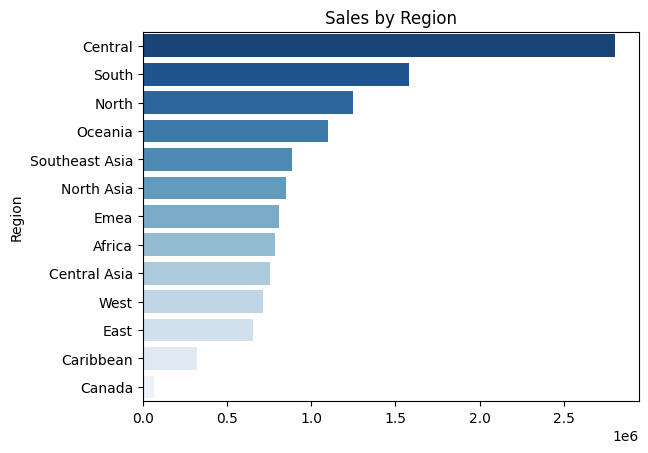

In [12]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=region_sales.values, y=region_sales.index, palette="Blues_r")
plt.title("Sales by Region")
plt.show()

Sales by Category & Sub-Category

C:\Users\Vasuki\AppData\Local\Temp\ipykernel_16636\3585148382.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_sales.values, y=cat_sales.index, palette="Greens_r")


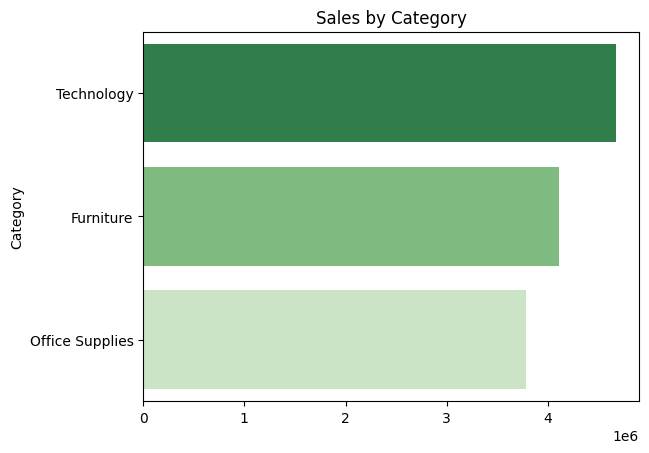

C:\Users\Vasuki\AppData\Local\Temp\ipykernel_16636\3585148382.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcat_sales.values, y=subcat_sales.index, palette="Oranges_r")


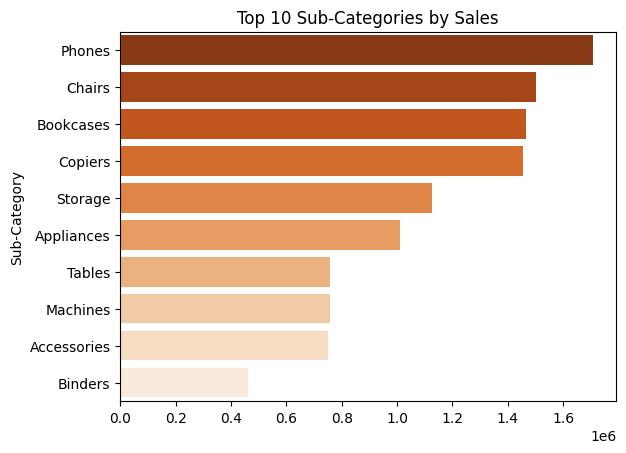

In [13]:
cat_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=cat_sales.values, y=cat_sales.index, palette="Greens_r")
plt.title("Sales by Category")
plt.show()

subcat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=subcat_sales.values, y=subcat_sales.index, palette="Oranges_r")
plt.title("Top 10 Sub-Categories by Sales")
plt.show()


Monthly Sales Trend

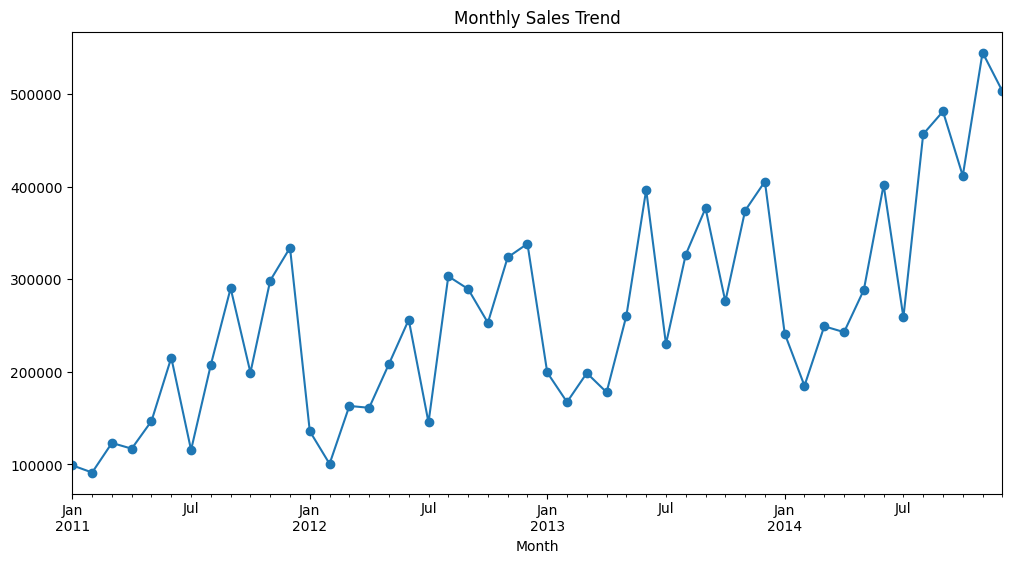

In [14]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.plot(kind='line', figsize=(12,6), marker='o', title="Monthly Sales Trend")
plt.show()


Top 10 Customers

C:\Users\Vasuki\AppData\Local\Temp\ipykernel_16636\3030772903.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette="Purples_r")


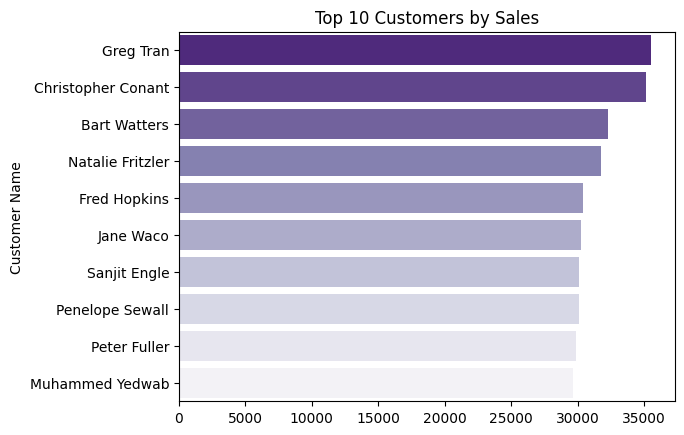

In [15]:
top_customers = df.groupby('Customer Name')['Sales'].sum().nlargest(10)
sns.barplot(x=top_customers.values, y=top_customers.index, palette="Purples_r")
plt.title("Top 10 Customers by Sales")
plt.show()


Loss-Making Products

C:\Users\Vasuki\AppData\Local\Temp\ipykernel_16636\2074268113.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loss_products.values, y=loss_products.index, palette="Reds_r")


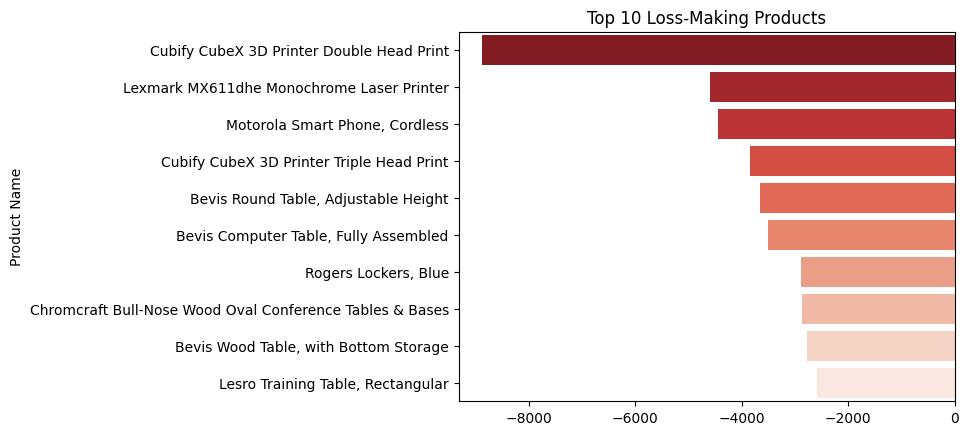

In [16]:
loss_products = df.groupby('Product Name')['Profit'].sum().nsmallest(10)
sns.barplot(x=loss_products.values, y=loss_products.index, palette="Reds_r")
plt.title("Top 10 Loss-Making Products")
plt.show()


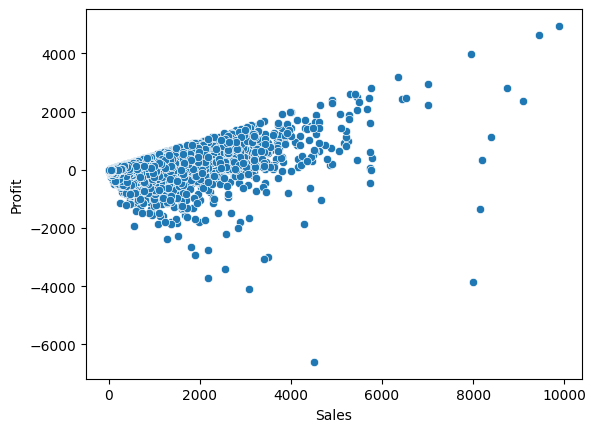

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="Sales", y="Profit", data=df)
plt.show()


### Total Sales

In [24]:

total_sales = df["Sales"].sum()


### Total profit

In [ ]:

total_profit = df["Profit"].sum()


np.float64(1445188.43848)

In [23]:

total_orders = df["Order ID"].nunique()
avg_order_value = total_sales / total_orders
profit_margin = total_profit / total_sales * 100

print("Total Sales:", total_sales)
print("Total Profit:", total_profit)
print("Total Orders:", total_orders)
print("Avg Order Value:", avg_order_value)
print("Profit Margin %:", profit_margin)


Total Sales: 12566663.58188
Total Profit: 1445188.43848
Total Orders: 25034
Avg Order Value: 501.98384524566586
Profit Margin %: 11.500176073495211


Segmentation Analysis

In [26]:
# Sales by Region
df.groupby("Region")["Sales"].sum().sort_values(ascending=False)

# Sales by Segment
df.groupby("Segment")["Sales"].sum()

# Sales by Ship Mode
df.groupby("Ship Mode")["Sales"].sum()


Ship Mode
First Class       1.805776e+06
Same Day          6.672020e+05
Second Class      2.565672e+06
Standard Class    7.528014e+06
Name: Sales, dtype: float64